# Topic: H.A.R.N.
## Scope: Agriculture
### Project Team: Maitri, Faryar and Mrunali


# A. Image Analysis & Preprocessing

##  Import Libraries


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import cv2
import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
%matplotlib inline


## Load Dataset

### Path Configuration

In [2]:
healthy_dir ='../input/harn-rice-ds/HARN RICE DS/Healthy'
n_def_dir = '../input/harn-rice-ds/HARN RICE DS/N_Deficiency'
p_def_dir = '../input/harn-rice-ds/HARN RICE DS/P_Deficiency'
k_def_dir = '../input/harn-rice-ds/HARN RICE DS/K_Deficiency'
dataset_dir = '../input/harn-rice-ds/HARN RICE DS'

In [3]:
def load_random_imgs_from_folder(folder):
  plt.figure(figsize=(20,20))
  for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.xlabel(f'Image Shape: {img.shape}')
    plt.imshow(img)

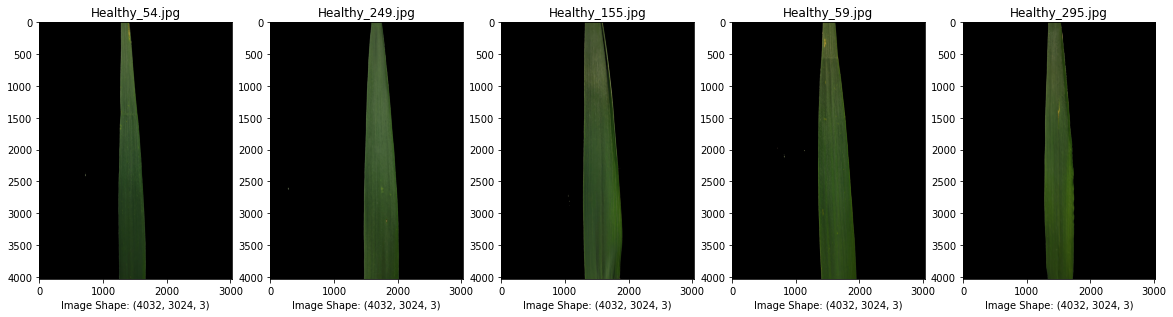

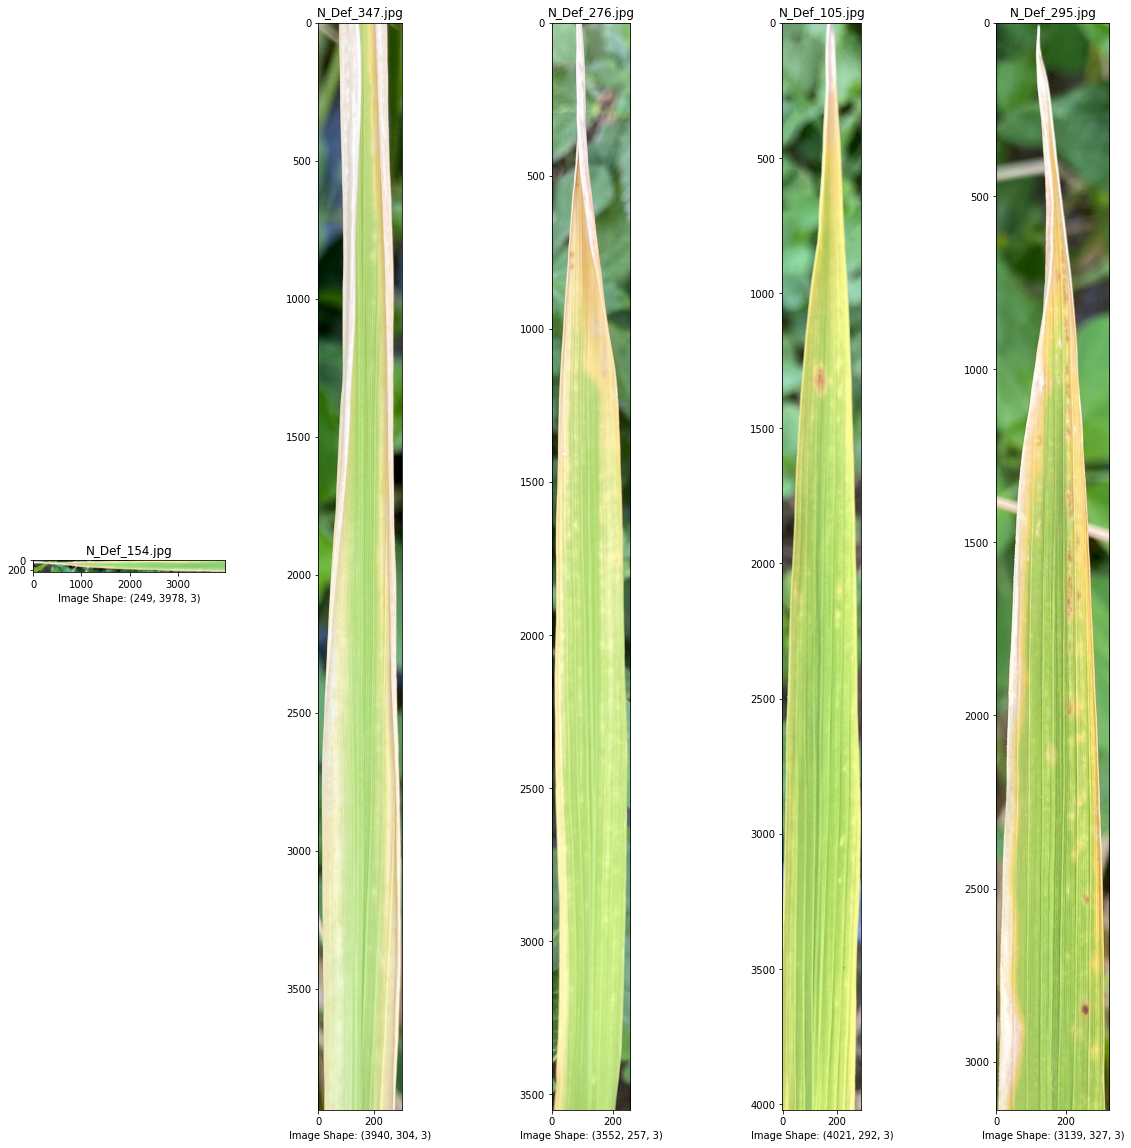

In [4]:
load_random_imgs_from_folder(healthy_dir)
print('\n\n')
load_random_imgs_from_folder(n_def_dir)

## Renaming the file names

In [5]:
# def rename_imgs(category, path):
#   # print(os.getcwd())
#   os.chdir(path)
#   print(os.getcwd())
#   for index, filename in enumerate(os.listdir(".")):
#     # print(filename, index)
#     os.rename(filename, f'{category}_{index+1}.jpg')
#     # print(filename)

In [6]:
# rename_imgs('Healthy', healthy_dir)
# rename_imgs('N_Def', n_def_dir)
# rename_imgs('P_Def', p_def_dir)
# rename_imgs('K_Def', k_def_dir)

## Create a dataframe


In [7]:
labels=[]
for i in os.listdir(dataset_dir):
  labels+=[i]

print(labels)

['P_Deficiency', 'Healthy', 'N_Deficiency', 'K_Deficiency']


In [8]:
IMG_SIZE = 224

In [9]:
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
              if img[-3:] != 'txt':
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
  

In [10]:
dataset = get_data(dataset_dir)
np.random.shuffle(dataset)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [11]:
len(dataset)

1530

In [12]:
train = dataset[:1070]
val = dataset[1070:1300]
test = dataset[1300:]

In [13]:
# train = dataset[:1021]
# val = dataset[1021:1192]
# test = dataset[1192:]

In [19]:
train_df = pd.DataFrame(train,columns=['Feature','Label'])

In [20]:
train_df.head(5)

,Feature,Label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,"[[[67, 108, 84], [61, 105, 78], [58, 107, 78],...",3
2,"[[[24, 48, 24], [23, 47, 24], [22, 46, 24], [2...",2
3,"[[[107, 92, 88], [99, 85, 81], [103, 90, 83], ...",3
4,"[[[115, 178, 119], [113, 174, 113], [110, 172,...",2


In [21]:
l=[]
for i in train_df['Label']:
  l.append(labels[i])

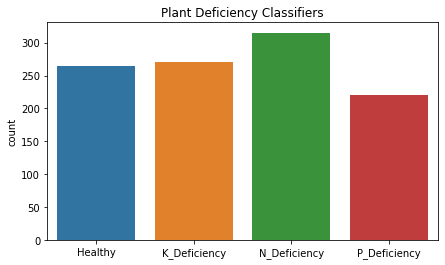

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(x=l);
plt.title('Plant Deficiency Classifiers');

## Splitting the dataset

In [ ]:
# X, test_img, Y, test_labels = train_test_split(df['Images'], df['Label'], test_size=0.2, shuffle = True, random_state = 2)

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 2)

In [ ]:
# # checking the balance of classifiers in the y_train
# print(y_train.value_counts())
# plt.figure(figsize=(7,4))
# sns.countplot(y_train);
# plt.title('Malaria Classifiers');

In [23]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Image Preprocessing

## Normalizing the dataset

In [24]:
np.array(x_train).max()

255

Text(0.5, 1.0, 'Healthy')

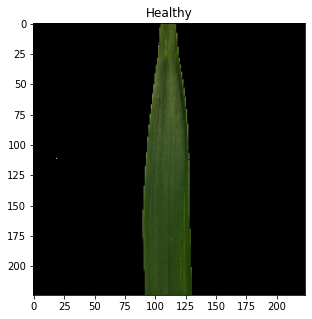

In [25]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [30]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)


In [106]:
x_test = np.array(x_test) / 255.0
y_test = np.array(y_test)

In [33]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1070, 224, 224, 3),
 (1070,),
 (230, 224, 224, 3),
 (230,),
 (230, 224, 224, 3),
 (230,))

In [ ]:
type(y_train[0])

In [ ]:
plt.figure(figsize=(20,20))

for i in range(8):
  img = x_train[i]
  ax=plt.subplot(1,8,i+1)
  ax.title.set_text(labels[y_train[i]])
  plt.xlabel(f'Image Shape: {img.shape}')
  plt.imshow(img)


## Image Preprocessing

In [ ]:
def plot_before_after(img, filtered_img):
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(filtered_img),plt.title('Filtered')
  plt.xticks([]), plt.yticks([])
  plt.show()


In [ ]:
class Filters:
  def __init__(self, x_train):
    self.x_train = x_train
  
  def Gaussian_Blurr(self, kernel):
    self.kernel = kernel
    gauss_blurr = []
    for i in range(len(self.x_train)-1):
      f_img = cv2.GaussianBlur(self.x_train[i], self.kernel,0)
      gauss_blurr.append(f_img)
    return gauss_blurr

  def Median_Blurr(self, K):
    self.K = K
    median_blurr = []
    for i in range(len(self.x_train)-1):
      img = self.x_train[i].astype('float32')
      f_img = cv2.medianBlur(img, self.K)
      median_blurr.append(f_img)
    return median_blurr

  def Bilateral_Blurr(self, diameter, sigmaColor, sigmaSpace):
    self.d = diameter
    self.sc = sigmaColor
    self.ss = sigmaSpace
    bilateral_blurr = []
    for i in range(len(self.x_train)-1):
      img = self.x_train[i].astype('float32')
      f_img = cv2.bilateralFilter(img, self.d, self.sc, self.ss)
      bilateral_blurr.append(f_img)
    return bilateral_blurr

In [ ]:
img_filter = Filters(x_train)

In [ ]:
gauss_imgs = img_filter.Gaussian_Blurr((3,3))
plot_before_after(x_train[4], gauss_imgs[4])

In [ ]:
medians = img_filter.Median_Blurr(3)
plot_before_after(x_train[2], medians[2])

In [ ]:
bilateral_imgs = img_filter.Bilateral_Blurr(3, 11, 5)
plot_before_after(x_train[2], bilateral_imgs[2])

## Image Augmentation

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].shape

In [26]:
# y_train=y_train.reshape(1070,1)
# y_val=y_val.reshape(230,1)

# # y_train=y_train.reshape(1021,1)
# # y_val=y_val.reshape(171,1)

In [43]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    featurewise_center=False,  # set input mean to 0 over the dataset 
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [45]:
# prepare an iterators to scale images
train_iterator_1 = train_datagen.flow(x_train, y_train, batch_size=64)
val_iterator_1 = val_datagen.flow(x_val, y_val, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator_1), len(val_iterator_1)))


Batches train=17, test=4


In [46]:

# confirm the scaling works
batchX, batchy = train_iterator_1.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Batch shape=(64, 224, 224, 3), min=0.000, max=1.000


# Functions

In [15]:
def learning_curve(model_fit, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [16]:
def fbeta(y_true, y_pred, threshold_shift=0):
    beta_squared = 4

    y_pred = K.clip(y_pred, 0, 1)
 
    y_pred_bin = K.round(y_pred + threshold_shift)
 
    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))
 
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
 
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

In [17]:
def confusion_matrix_plot(matrix):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels[::-1]);
    plt.show()


In [66]:
def cal_score(model, key):
    
        # evaluate the model
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    # predict probabilities for test set
    yprobs = model.predict(x_test, verbose=0)
    # predict crisp classes for test set
    yclasses = np.argmax(yprobs,axis=1)


    kappa = cohen_kappa_score(y_test, yclasses)
    print('Cohens kappa: %f' % kappa)
    print('\n')
    # confusion matrix
    matrix = confusion_matrix(y_test, yclasses)
    print(matrix)
    print('\n')

    f1 = f1_score(y_test, yclasses, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')

    print(classification_report(y_test, yclasses, target_names=labels))
    
    if key==1:
        confusion_matrix_plot(matrix)

# Modelling

### MODEL 1

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [47]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=0),
                ModelCheckpoint(filepath='weights/best_model',
                                 save_best_only=True,
                                 save_weights_only=True)]

In [211]:
model23 = Sequential([
    
    # layer 1
    Conv2D(32, kernel_size=(7, 7), activation='relu', padding='same', input_shape=x_train[0].shape),
    Conv2D(32, kernel_size=(7, 7), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # layer 2
    Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # layer 3
    Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
     # layer 4
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
    Flatten(),
    
    # Fully Connected Layer
    Dense(128, activation='relu'),
#     BatchNormalization(),
    Dropout(0.5),
    
    Dense(4, activation='softmax'),

])

In [212]:
model23.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 224, 224, 32)      4736      
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 218, 218, 32)      50208     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 109, 109, 64)      51264     
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 105, 105, 64)      102464    
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 52, 52, 64)      

In [213]:
opt = Adam(learning_rate=0.00015)
model23.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [214]:
hist1 = model23.fit_generator(train_iterator_1,epochs=16,verbose=1,validation_data=val_iterator_1, callbacks = callbacks)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/16
17/17 [==============================] - 13s 736ms/step - loss: 1.2401 - accuracy: 0.3299 - val_loss: 1.2644 - val_accuracy: 0.5217
Epoch 2/16
17/17 [==============================] - 11s 666ms/step - loss: 1.1363 - accuracy: 0.5374 - val_loss: 1.0758 - val_accuracy: 0.5652
Epoch 3/16
17/17 [==============================] - 12s 690ms/step - loss: 0.9334 - accuracy: 0.5495 - val_loss: 0.8963 - val_accuracy: 0.6609
Epoch 4/16
17/17 [==============================] - 12s 707ms/step - loss: 0.7914 - accuracy: 0.6047 - val_loss: 0.8572 - val_accuracy: 0.6217
Epoch 5/16
17/17 [==============================] - 11s 669ms/step - loss: 0.7299 - accuracy: 0.6645 - val_loss: 0.7243 - val_accuracy: 0.7217
Epoch 6/16
17/17 [==============================] - 11s 668ms/step - loss: 0.6509 - accuracy: 0.7150 - val_loss: 0.6432 - val_accuracy: 0.7435
Epoch 7/16
17/17 [==============================] - 13s 737ms/step - loss: 0.6245 - accuracy: 0.7168 - val_loss: 0.6431 - val_accuracy: 0.7609

In [ ]:
# hist1=model1.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_val,y_val), callbacks = callbacks)

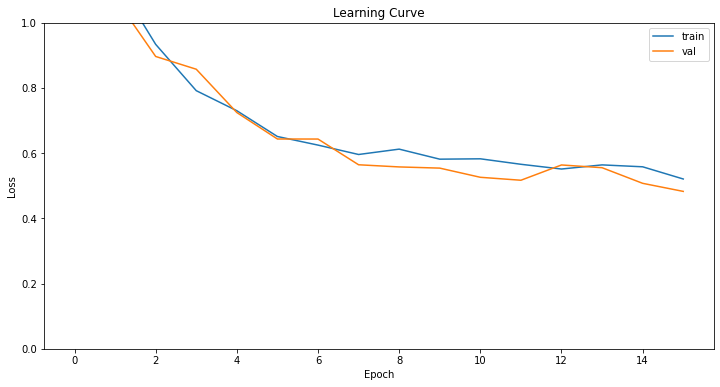

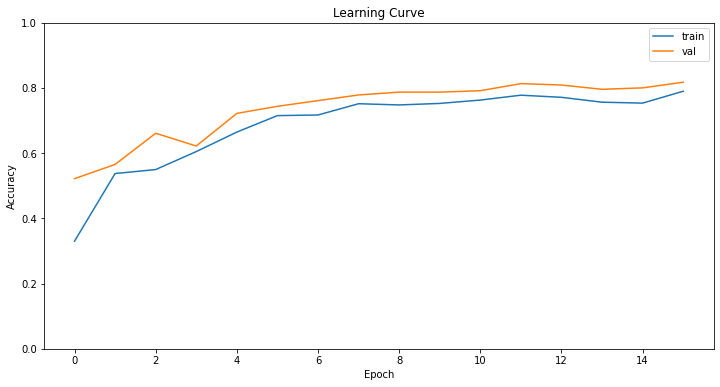

In [215]:
learning_curve(hist1,'loss', ylim=(0,1))
learning_curve(hist1, 'accuracy', ylim=(0,1))

Train: 0.736, Test: 0.787
Cohens kappa: 0.717501


[[27  0  8 28]
 [ 0 61  0  0]
 [ 3  0 47  4]
 [ 5  0  1 46]]


F1 Score: 0.7767814793901751


              precision    recall  f1-score   support

P_Deficiency       0.77      0.43      0.55        63
     Healthy       1.00      1.00      1.00        61
N_Deficiency       0.84      0.87      0.85        54
K_Deficiency       0.59      0.88      0.71        52

    accuracy                           0.79       230
   macro avg       0.80      0.80      0.78       230
weighted avg       0.81      0.79      0.78       230



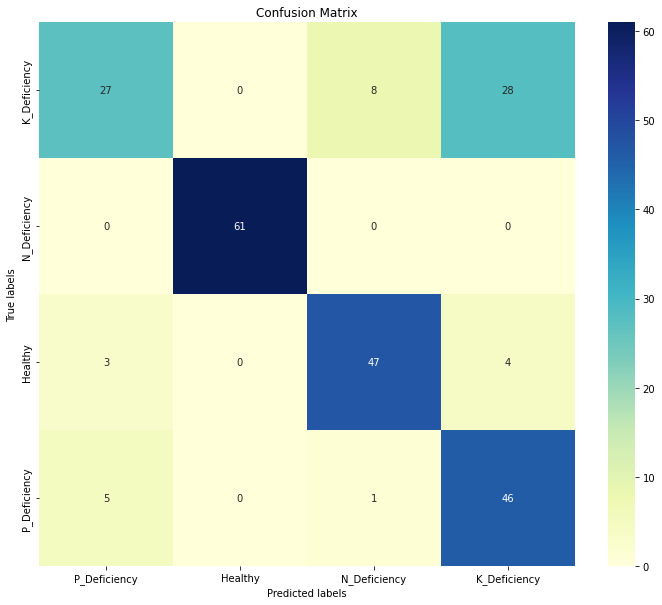

In [216]:
cal_score(model23, 1)

In [140]:
model12.save('83testacc__82F1Score.hdf5')

## MODEL 1 with Image Augmentation

In [ ]:
model1_2 = Sequential([
    
    # layer 1
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=x_train[0].shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # layer 2
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # layer 3
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    
    # Fully Connected Layer
    Dense(256, activation='relu'),
#     BatchNormalization(),
    Dropout(0.2),
    
    Dense(4, activation='softmax'),

])

In [ ]:
model1_2.summary()

In [ ]:
dataAugmentation = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20,  
                                     fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
                                     width_shift_range = 0.1, height_shift_range = 0.1)

dataAugmentation.fit(x_train)

In [ ]:
opt = Adam(learning_rate=0.0001)
model1_2.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
hist1_2 = model1.fit_generator(dataAugmentation.flow(x_train, y_train, batch_size = 20), 
                             validation_data = (x_val, y_val), 
                             steps_per_epoch = len(x_train) // 20, 
                             epochs = 20, callbacks=callbacks)

In [ ]:
learning_curve(hist1_2,'loss', ylim=(0,1))
learning_curve(hist1_2, 'accuracy', ylim=(0,1))

In [ ]:
cal_score(model1, 1)

### importing images


In [ ]:
# batch_size = 20

In [ ]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   dataset_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(IMG_SIZE, IMG_SIZE),
#   batch_size=batch_size)

In [ ]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   dataset_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(IMG_SIZE, IMG_SIZE),
#   batch_size=batch_size)

In [ ]:
# class_names = train_ds.class_names
# print(class_names)

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# num_classes = len(class_names)
# model2 = Sequential([
    
    
#     Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    
#     # layer 1
#     Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
#     Conv2D(32, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
#     # layer 2
#     Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
#     # layer 3
#     Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
#     Conv2D(128, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
#     Flatten(),
    
#     # Fully Connected Layer
#     Dense(256, activation='relu'),
# #     BatchNormalization(),
#     Dropout(0.2),
    
#     Dense(num_classes, activation='softmax'),

# ])

In [ ]:
# opt = Adam(learning_rate=0.0001)
# model2.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
# epochs=10
# history = model2.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

In [ ]:
# learning_curve(history,'loss', ylim=(0,1))
# learning_curve(history, 'accuracy', ylim=(0,1))

In [ ]:
# cal_score(model2, 1)

In [ ]:
# data_augmentation = keras.Sequential(
#   [
#       RandomFlip("horizontal", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
#       RandomRotation(0.1),
#       RandomZoom(0.1),
#   ]
# )

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

### TEST 4


In [ ]:
from tensorflow.keras import regularizers 

In [ ]:
model9 = Sequential([
    
    # layer 1
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=x_train[0].shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # layer 2
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # layer 3
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l=0.01)),
#     Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
#     MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    
    Flatten(),
    
    # Fully Connected Layer
    Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.2),
    
    Dense(4, activation='softmax'),

])


In [ ]:
opt = Adam(learning_rate=0.0001)
model9.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
hist8=model9.fit(x_train,y_train,batch_size=50,epochs=12,verbose=1,validation_data=(x_val,y_val), callbacks = callbacks)
#

In [ ]:
learning_curve(hist8,'loss', ylim=(0,1))
learning_curve(hist8, 'accuracy', ylim=(0,1))

In [ ]:
# cal_score(model3, 1)

In [217]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [218]:
for layer in base_model.layers:
    layer.trainable = False

In [234]:

# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(128, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.3)(x)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(4, activation='softmax')(x)

vgg_model8= tf.keras.models.Model(base_model.input, x)

vgg_model8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [235]:
# vgg_hist4=vgg_model5.fit(x_train,y_train,batch_size=16,epochs=20,verbose=1,validation_data=(x_val,y_val), callbacks = callbacks, steps_per_epoch = len(x_train) // 16)

In [236]:
vgg_hist4 = vgg_model8.fit_generator(train_iterator_1,epochs=20,verbose=1,validation_data=val_iterator_1, callbacks = callbacks)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 [==============================] - 13s 731ms/step - loss: 0.9466 - accuracy: 0.5467 - val_loss: 0.6401 - val_accuracy: 0.8043
Epoch 2/20
17/17 [==============================] - 12s 682ms/step - loss: 0.6069 - accuracy: 0.7346 - val_loss: 0.4906 - val_accuracy: 0.7913
Epoch 3/20
17/17 [==============================] - 12s 681ms/step - loss: 0.5155 - accuracy: 0.7916 - val_loss: 0.4039 - val_accuracy: 0.8739
Epoch 4/20
17/17 [==============================] - 12s 722ms/step - loss: 0.4457 - accuracy: 0.8271 - val_loss: 0.4059 - val_accuracy: 0.8348
Epoch 5/20
17/17 [==============================] - 11s 670ms/step - loss: 0.4206 - accuracy: 0.8299 - val_loss: 0.3373 - val_accuracy: 0.8696
Epoch 6/20
17/17 [==============================] - 11s 673ms/step - loss: 0.4186 - accuracy: 0.8579 - val_loss: 0.3184 - val_accuracy: 0.8913
Epoch 7/20
17/17 [==============================] - 12s 703ms/step - loss: 0.3462 - accuracy: 0.8832 - val_loss: 0.3062 - val_accuracy: 0.8913

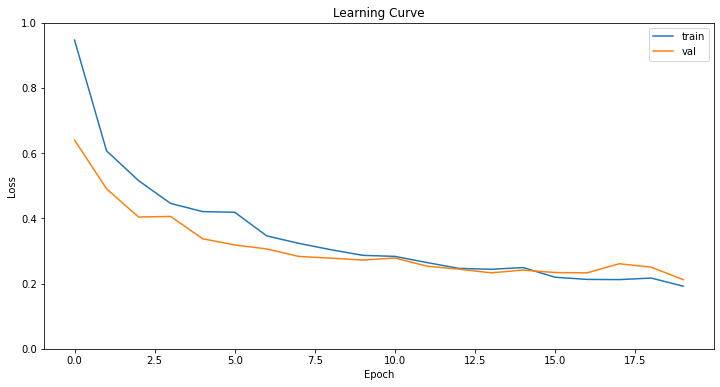

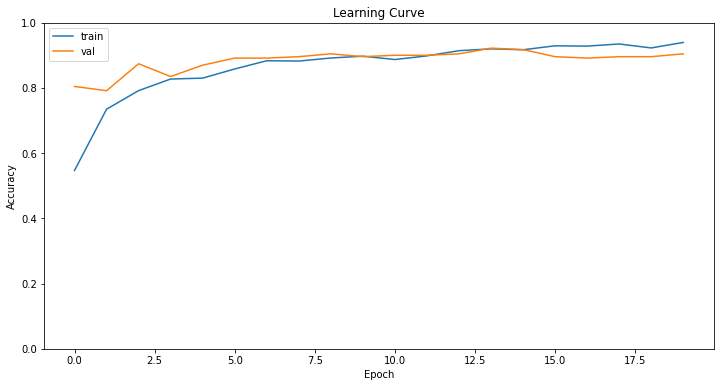

In [237]:
learning_curve(vgg_hist4,'loss', ylim=(0,1))
learning_curve(vgg_hist4, 'accuracy', ylim=(0,1))

Train: 0.707, Test: 0.926
Cohens kappa: 0.901250


[[56  0  1  6]
 [ 0 61  0  0]
 [ 0  0 53  1]
 [ 6  0  3 43]]


F1 Score: 0.925472629662911


              precision    recall  f1-score   support

P_Deficiency       0.90      0.89      0.90        63
     Healthy       1.00      1.00      1.00        61
N_Deficiency       0.93      0.98      0.95        54
K_Deficiency       0.86      0.83      0.84        52

    accuracy                           0.93       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.93      0.93      0.93       230



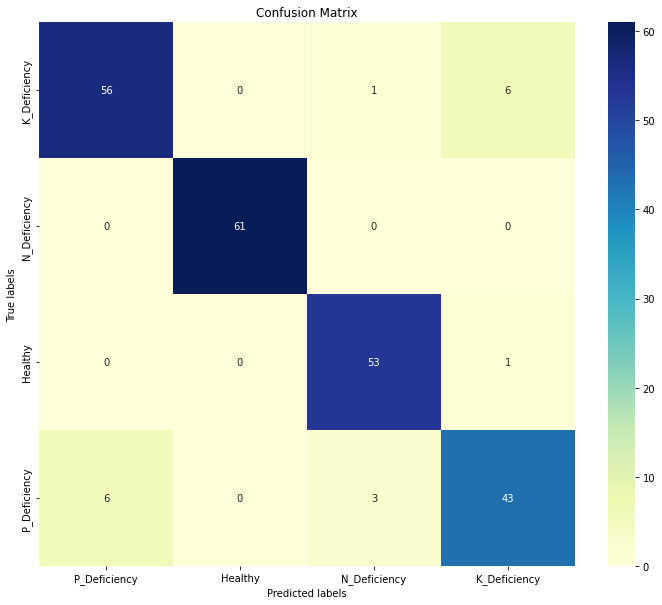

In [239]:
cal_score(vgg_model8, 1)

In [233]:
vgg_model6.save('vgg 90%F1 90%testacc score.hdf5')

### Manual Testing

In [ ]:
test_model_4 = Sequential([
    
    # layer 1
    Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=x_train[0].shape),
#     Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
        # layer 2
#     Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=x_train[0].shape),
#     Conv2D(32, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
    
    Flatten(),
    
    # Fully Connected Layer
    Dense(128, activation='relu'),
    #BatchNormalization(),
    Dropout(0.2),
    
    Dense(4, activation='softmax'),

])


In [ ]:
test_model_3.summary()

In [ ]:
opt = Adam(learning_rate=0.0001)
test_model_4.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
test_hist_3=test_model_3.fit(x_train,y_train,batch_size=16,epochs=20,verbose=1,
                             validation_data=(x_val,y_val), callbacks = callbacks, 
                             steps_per_epoch = len(x_train) // 16)

In [ ]:
learning_curve(test_hist_3,'loss', ylim=(0,1))
learning_curve(test_hist_3, 'accuracy', ylim=(0,1))

In [ ]:
cal_score(test_model_3, 1)

In [ ]:
test_aug_4 = test_model_4.fit_generator(dataAugmentation.flow(x_train, y_train, batch_size = 32), 
                             validation_data = (x_val, y_val), 
                             steps_per_epoch = len(x_train) // 32, 
                             epochs = 50, callbacks=callbacks)

In [ ]:
learning_curve(test_aug_4,'loss', ylim=(0,1))
learning_curve(test_aug_4, 'accuracy', ylim=(0,1))

In [ ]:
cal_score(test_model_3, 1)